# Multi-Modal Data Fusion - Project Work: Multi-Modal Physical Exercise Classification


In this project, real multi-modal data is studied by utilizing different techniques presented during the course. In addition, there is an optional task to try some different approaches to identify persons from the same dataset. Open MEx dataset from UCI machine learning repository is used. Idea is to apply different techniques to recognize physical exercises from wearable sensors and depth camera, user-independently.

## Author(s)
Add your information here

Name(s): Syed Abdullah Hassan, Andrea Heigl

Student number(s): 2411987, TODO:PUT ID HERE

## Description

The goal of this project is to develop user-independent pre-processing and classification models to recognize 7 different physical exercises measured by accelerometer (attached to subject's thigh) and depth camera (above the subject facing downwards recording an aerial view). All the exercises were performed subject lying down on the mat. Original dataset have also another acceleration sensor and pressure-sensitive mat, but those two modalities are ommited in this project. There are totally 30 subjects in the original dataset, and in this work subset of 10 person is utilized. Detailed description of the dataset and original data can be access in [MEx dataset @ UCI machine learning repository](https://archive.ics.uci.edu/ml/datasets/MEx#). We are providing the subset of dataset in Moodle.

The project work is divided on following phases:

1. Data preparation, exploration, and visualization
2. Feature extraction and unimodal fusion for classification
3. Feature extraction and feature-level fusion for multimodal classification
4. Decision-level fusion for multimodal classification
5. Bonus task: Multimodal biometric identification of persons

where 1-4 are compulsory (max. 10 points each), and 5 is optional to get bonus points (max. 5+5 points). In each phase, you should visualize and analyse the results and document the work and findings properly by text blocks and figures between the code. <b> Nice looking </b> and <b> informative </b> notebook representing your results and analysis will be part of the grading in addition to actual implementation.

The results are validated using confusion matrices and F1 scores. F1 macro score is given as
<br>
<br>
$
\begin{equation}
F1_{macro} = \frac{1}{N} \sum_i^N F1_i,
\end{equation}
$
<br>
<br>
where $F1_i = 2  \frac{precision_i * recall_i}{precision_i + recall_i}$, and $N$ is the number of classes.
<br>

## Learning goals

After the project work, you should  

- be able to study real world multi-modal data
- be able to apply different data fusion techniques to real-world problem
- be able to evaluate the results
- be able to analyse the outcome
- be able to document your work properly

## Relevant lectures

Lectures 1-8

## Relevant exercises

Exercises 0-6

## Relevant chapters in course book

Chapter 1-14

## Additional Material

* Original dataset [MEx dataset @ UCI machine learning repository](https://archive.ics.uci.edu/ml/datasets/MEx#)
* Related scientific article [MEx: Multi-modal Exercises Dataset for Human Activity Recognition](https://arxiv.org/pdf/1908.08992.pdf)

# 1. Data preparation, exploration, and visualization

<a id='task1'></a>
<div class=" alert alert-warning">
    <b>Assigment.</b> <b>Task 1.</b>

Download data from the Moodle's Project section. Get yourself familiar with the folder structure and data. You can read the data files using the function given below. **Each file consists one exercise type performed by single user.** Data are divided on multiple folders. Note that, **in each folder there is one long sequence of single exercise**, except exercise 4 which is performed two times in different ways. Those two sequences belongs to same class. Do the following subtasks to pre-analyse data examples and to prepare the training and testing data for next tasks:
<br>
<br>
 Read raw data from the files. Prepare and **divide each data file to shorter sequences using windowing method**. Similar to related article "MEx: Multi-modal Exercises Dataset for Human Activity Recognition", use 5 second window and 3 second overlapping between windows, **producing several example sequences from one exercise file for classification purposes**. Windowing is working so that starting from the beginning of each long exercise sequence, take 5 seconds of data points (from synchronized acceleration data and depth images) based on the time stamps. Next, move the window 2 seconds forward and take another 5 seconds of data. Then continue this until your are at the end of sequence. **Each window** will consists **500x3 matrix of acceleration data** and **5x192 matrix of depth image data**.

</div>

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# Import relevant libraries here
from pathlib import Path
from copy import deepcopy
import numpy as np
import pandas as pd

# Enter data folder location
# loc = "/content/drive/MyDrive/Colab Notebooks/Multi-Modal Data Fusion/MEx"
loc = "/Users/abdullah/Desktop/studies/MMDF/project/Multi-Modal-Physical-Exercise-Classification/MEx"
print(loc)

/Users/abdullah/Desktop/studies/MMDF/project/Multi-Modal-Physical-Exercise-Classification/MEx


In [13]:
"""
    IMPORTANT: PLEASE DO NOT MODIFY THE CODE IN THIS CELL.
"""
def path_to_meta(p):
    meta = dict()
    meta["subject_id"] = p.parent.stem
    meta["exercise_id"] = p.stem.split("_")[-2]
    meta["trial"] = int(p.stem.split("_")[-1])
    meta["sensor_code"] = p.stem.split("_")[0]
    meta["sensor"] = {"act": "acc", "dc": "dc"}[meta["sensor_code"]]
    return meta

# Find, read, and compose the measurements
paths_record = Path(loc).glob("*/*/*.csv")

records = []

for path_record in paths_record:
    df = pd.read_csv(path_record, delimiter=",", header=None)
    meta = path_to_meta(path_record)

    if meta["sensor"] == "acc":
        col_names = ["time", "acc_0", "acc_1", "acc_2"]
        df.columns = col_names
    else:
        num_cols = df.shape[1]
        col_names = ["time", ] + [f"dc_{i}" for i in range(num_cols-1)]
        df.columns = col_names

    meta["df"] = df

    records.append(meta)

df_records = pd.DataFrame.from_records(records)

print(f"Total records found: {len(df_records)}")
print("Dataframe with all records:")
display(df_records.head(10))
print("Dataframe with one measurement series:")
display(df_records["df"].iloc[0].head())

Total records found: 160
Dataframe with all records:


,subject_id,exercise_id,trial,sensor_code,sensor,df
0,03,02,1,act,acc,time acc_0 acc_1 acc_2 0 ...
1,03,04,2,act,acc,time acc_0 acc_1 acc_2 0 ...
2,03,06,1,act,acc,time acc_0 acc_1 acc_2 0 ...
3,03,04,1,act,acc,time acc_0 acc_1 acc_2 0 ...
4,03,03,1,act,acc,time acc_0 acc_1 acc_2 0 ...
5,03,01,1,act,acc,time acc_0 acc_1 acc_2 0 ...
6,03,05,1,act,acc,time acc_0 acc_1 acc_2 0 ...
7,03,07,1,act,acc,time acc_0 acc_1 acc_2 0 ...
8,04,01,1,act,acc,time acc_0 acc_1 acc_2 0 ...
9,04,03,1,act,acc,time acc_0 acc_1 acc_2 0 ...


Dataframe with one measurement series:


,time,acc_0,acc_1,acc_2
0,0.0,-0.765625,0.484375,-0.375000
1,10.0,-0.765625,0.493750,-0.365625
2,20.0,-0.765625,0.490625,-0.368750
3,30.0,-0.765625,0.494792,-0.364583
4,40.0,-0.765625,0.489063,-0.370312


In [15]:
# check acceleration data

# filter just the rows with sensor 'acc'
acc_rows = df_records[df_records["sensor"] == "acc"].iloc[0]

# show the first 5 rows of the df
print("Erste Zeile mit 'acc':")
display(acc_rows["df"].head())


Erste Zeile mit 'acc':


,time,acc_0,acc_1,acc_2
0,0.0,-0.765625,0.484375,-0.375000
1,10.0,-0.765625,0.493750,-0.365625
2,20.0,-0.765625,0.490625,-0.368750
3,30.0,-0.765625,0.494792,-0.364583
4,40.0,-0.765625,0.489063,-0.370312


In [17]:
"""
    IMPORTANT: PLEASE DO NOT MODIFY THE CODE IN THIS CELL.
"""

# Extract 5-second long windows with 2-second shift (3-second overlap)

records_windowed = []

time_window = 5000.
time_offset = 2000.

for row_idx, row_data in df_records.iterrows():
    df_tmp = row_data["df"]
    time_start = np.min(df_tmp["time"].to_numpy())
    time_end = np.max(df_tmp["time"].to_numpy())

    for window_idx, t0 in enumerate(np.arange(time_start, time_end, time_offset)):
        t1 = t0 + time_window
        # Handle boundary conditions - skip the measurements from the end shorter than window size
        if t1 > time_end:
            continue

        tmp_data = deepcopy(row_data)
        tmp_data["window_idx"] = window_idx
        tmp_data["df"] = df_tmp[(df_tmp["time"] >= t0) &
                                (df_tmp["time"] < t1)].copy()

        records_windowed.append(tmp_data)

df_records_windowed = pd.DataFrame.from_records(records_windowed)

print(f"Total windows extracted: {len(df_records_windowed)}")
print("Dataframe with all windowed records:")
display(df_records_windowed.head())
print("Dataframe with one windowed measurement series:")
display(df_records_windowed["df"].iloc[0].head())

Total windows extracted: 4169
Dataframe with all windowed records:


,subject_id,exercise_id,trial,sensor_code,sensor,df,window_idx
0,03,02,1,act,acc,time acc_0 acc_1 acc_2 0 ...,0
1,03,02,1,act,acc,time acc_0 acc_1 acc_2 200 ...,1
2,03,02,1,act,acc,time acc_0 acc_1 acc_2 400 ...,2
3,03,02,1,act,acc,time acc_0 acc_1 acc_2 60...,3
4,03,02,1,act,acc,time acc_0 acc_1 acc_2 80...,4


Dataframe with one windowed measurement series:


,time,acc_0,acc_1,acc_2
0,0.0,-0.765625,0.484375,-0.375000
1,10.0,-0.765625,0.493750,-0.365625
2,20.0,-0.765625,0.490625,-0.368750
3,30.0,-0.765625,0.494792,-0.364583
4,40.0,-0.765625,0.489063,-0.370312


In [19]:
display(df_records_windowed[df_records_windowed["sensor"] == "dc"]["df"].iloc[0]) # shows the part of df_records_windowed in which the sensor data is dc
display(df_records_windowed[df_records_windowed["sensor"] == "acc"]["df"].iloc[0]) # shows the part of df_records_windowed in which the sensor data is acc

,time,dc_0,dc_1,dc_2,dc_3,dc_4,dc_5,dc_6,dc_7,dc_8,...,dc_182,dc_183,dc_184,dc_185,dc_186,dc_187,dc_188,dc_189,dc_190,dc_191
0,0.0,0.4589,0.9178,0.9257,0.921,0.921,0.9178,0.9149,0.9139,0.9116,...,0.9578,0.9531,0.9531,0.9531,0.9499,0.9499,0.9468,0.9468,0.9397,0.9397
1,1000.0,0.4605,0.9194,0.9249,0.921,0.921,0.9178,0.9139,0.9133,0.9122,...,0.9578,0.9531,0.9531,0.9531,0.9499,0.9499,0.9468,0.9468,0.9397,0.9397
2,2000.0,0.4605,0.9178,0.9249,0.921,0.921,0.9178,0.9139,0.9133,0.9116,...,0.9570,0.9531,0.9531,0.9531,0.9499,0.9499,0.9468,0.9468,0.9397,0.9397
3,3000.0,0.4589,0.9176,0.9241,0.921,0.921,0.9178,0.9139,0.9139,0.9116,...,0.9586,0.9531,0.9531,0.9531,0.9499,0.9499,0.9468,0.9468,0.9397,0.9397
4,4000.0,0.4605,0.9186,0.9249,0.921,0.921,0.9178,0.9139,0.9122,0.9122,...,0.9586,0.9531,0.9531,0.9531,0.9499,0.9499,0.9468,0.9468,0.9397,0.9397


,time,acc_0,acc_1,acc_2
0,0.0,-0.765625,0.484375,-0.375000
1,10.0,-0.765625,0.493750,-0.365625
2,20.0,-0.765625,0.490625,-0.368750
3,30.0,-0.765625,0.494792,-0.364583
4,40.0,-0.765625,0.489063,-0.370312
...,...,...,...,...
495,4950.0,-0.500000,0.796875,-0.234375
496,4960.0,-0.500000,0.796875,-0.234375
497,4970.0,-0.500000,0.812500,-0.234375
498,4980.0,-0.500000,0.796875,-0.234375


<a id='task1'></a>
<div class=" alert alert-warning">
     
<p> <b>1.1</b> Plot few examples of prepared data for each modalities (accelometer and depth camera). Plot acceleration sensor as multi-dimensional time-series and depth camera data as 2D image. Plot 5 second acceleration sensor and depth image sequences of person 1 and 5 performing exercises 2, 5, and 6. Take the first windowed example from the long exercise sequence. </p>

</div>

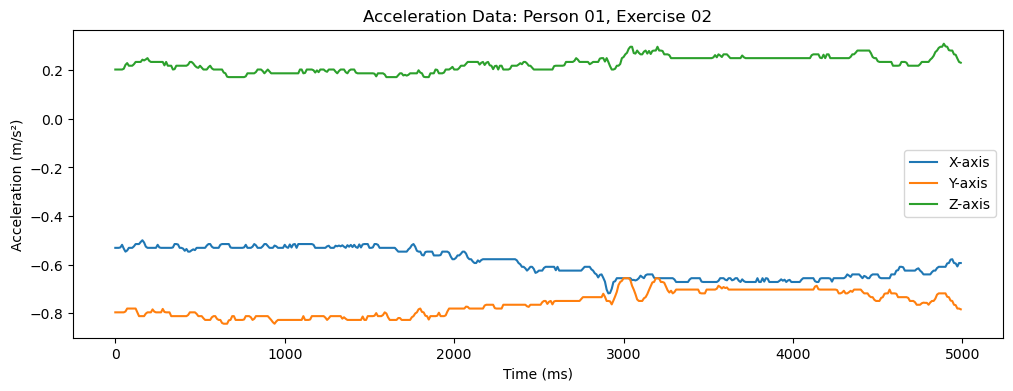

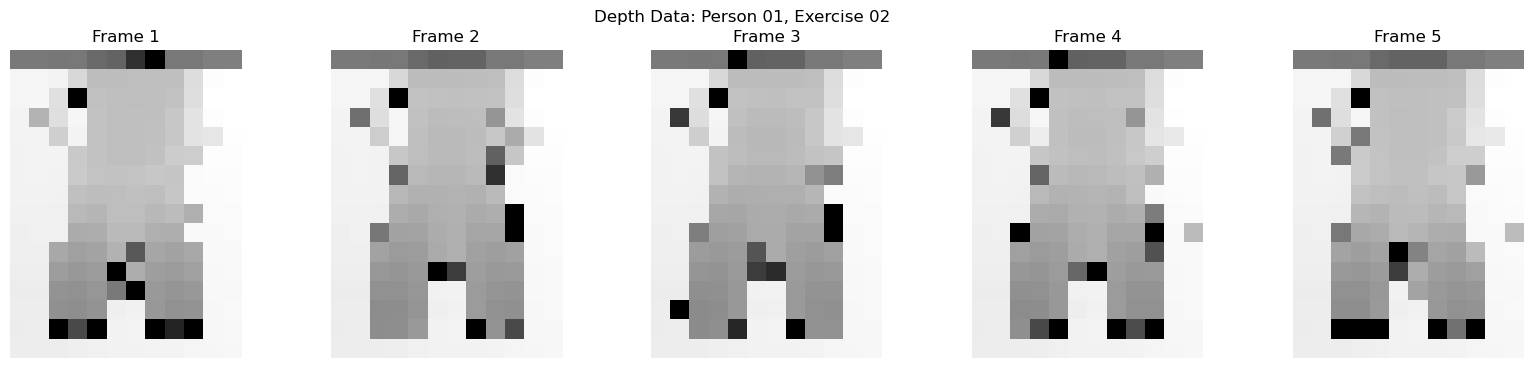

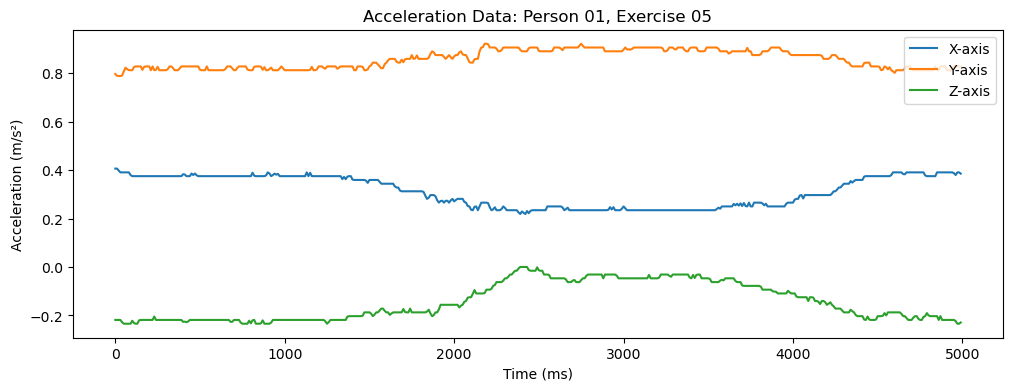

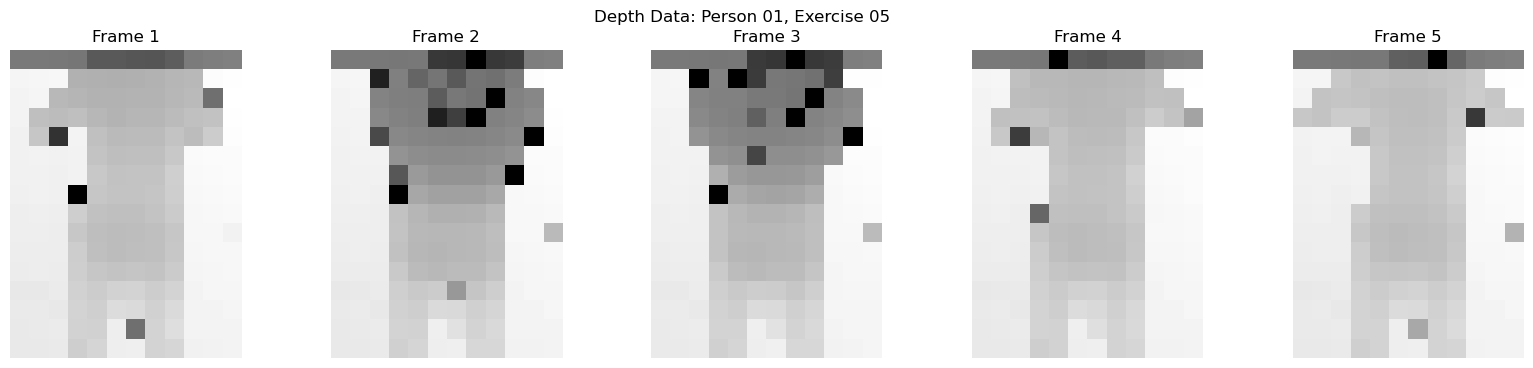

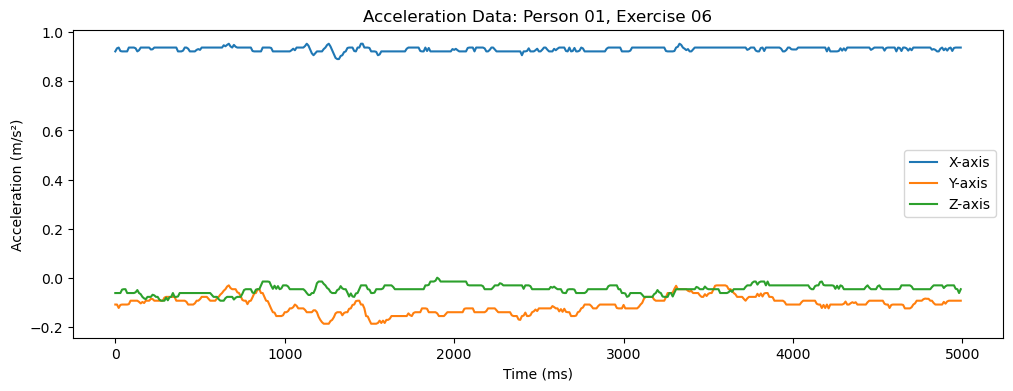

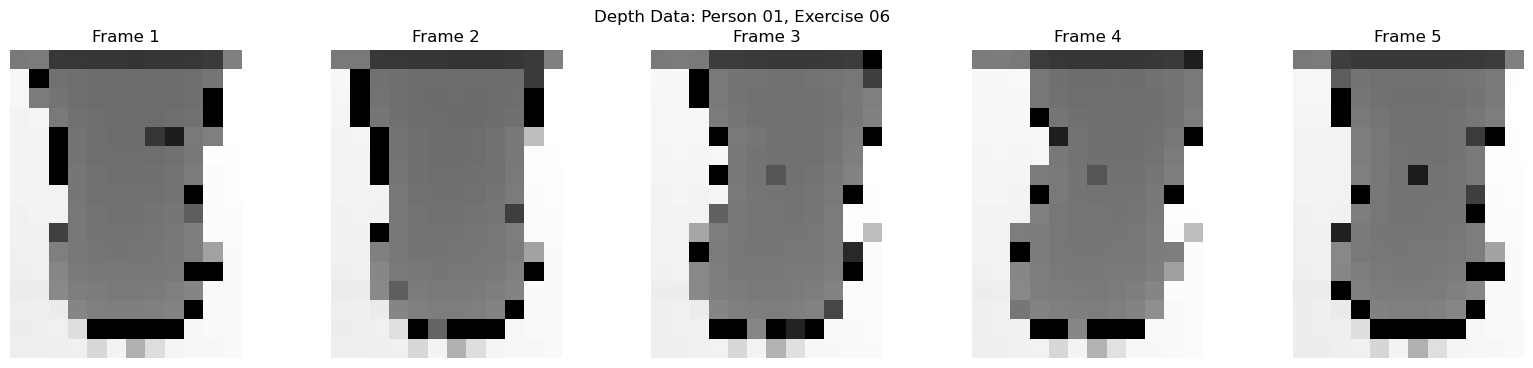

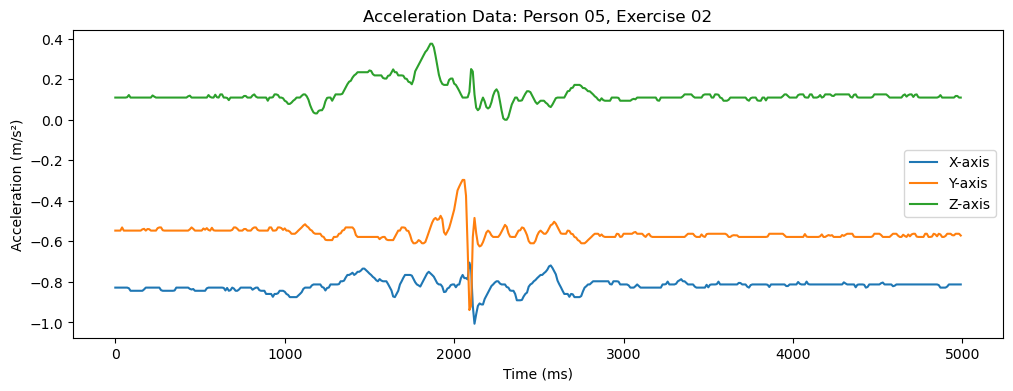

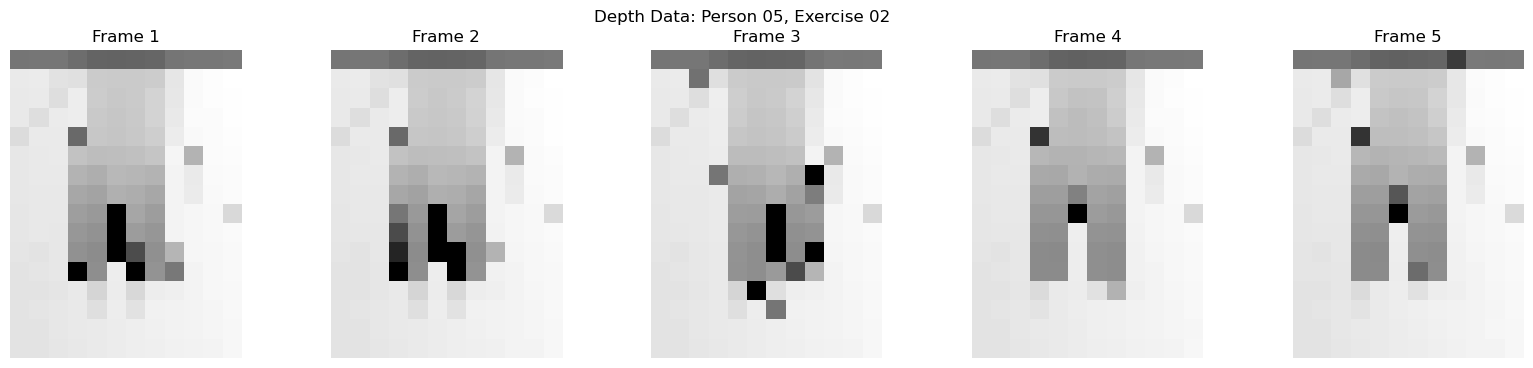

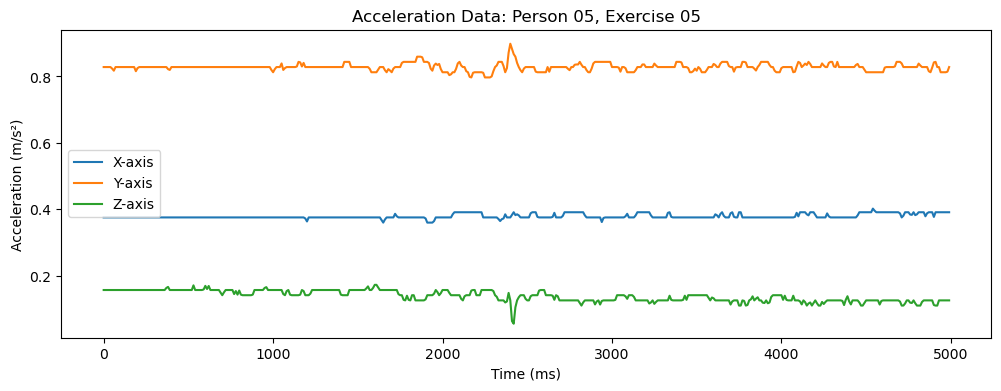

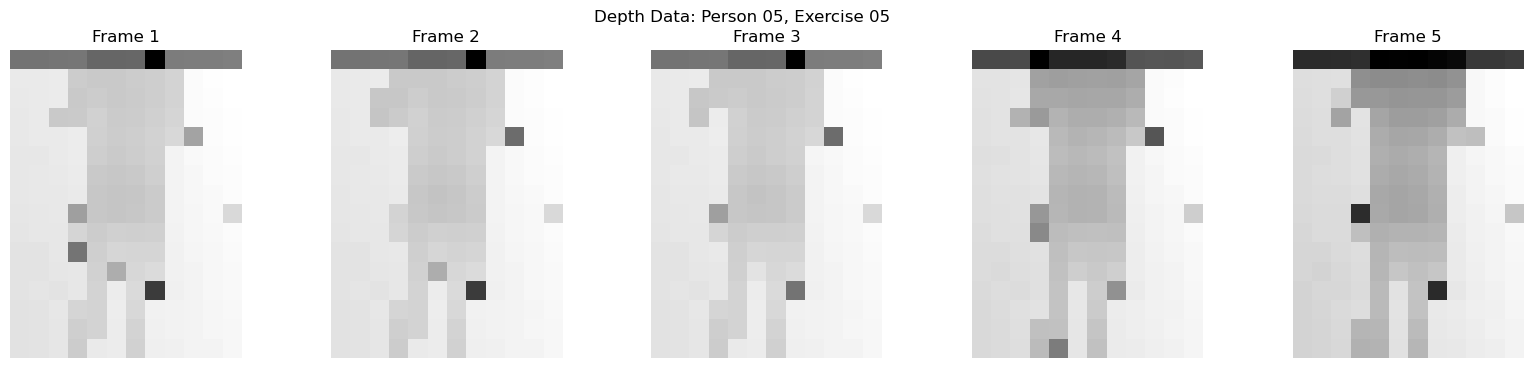

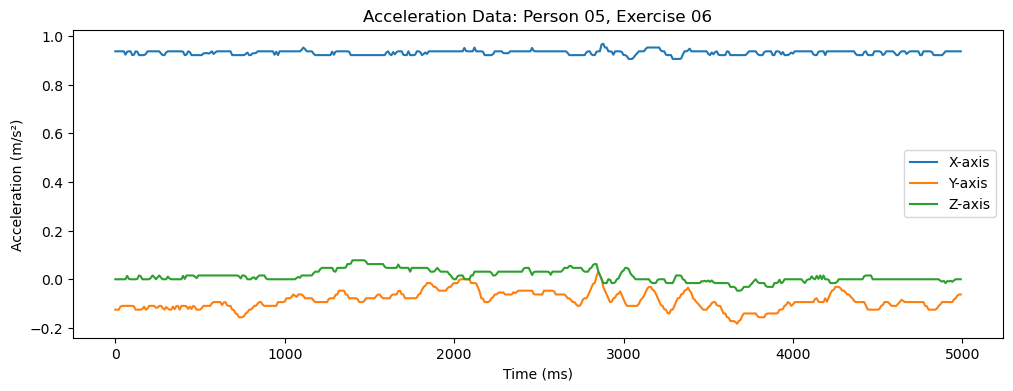

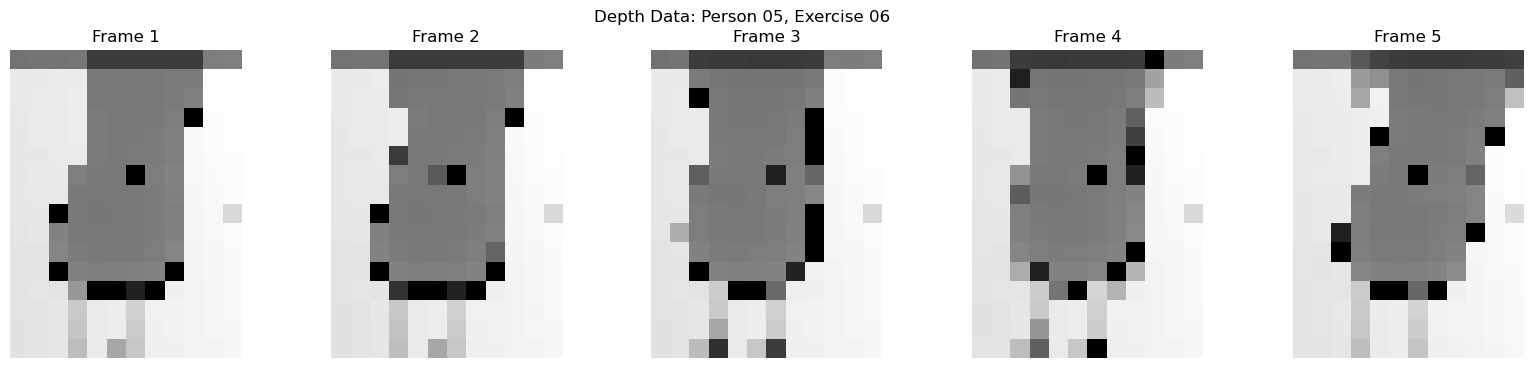

In [41]:
# 1.1. Visualize selected samples for both modalities

### Your code begins here ###

import matplotlib.pyplot as plt

# Select persons and exercises
persons = ["01", "05"]
exercises = ["02", "05", "06"]

# Filter the relevant data from the DataFrame
for person in persons:
    for exercise in exercises:
        # Filter for person, exercise, and the first window
        filtered_data = df_records_windowed[
            (df_records_windowed["subject_id"] == person) &
            (df_records_windowed["exercise_id"] == exercise) &
            (df_records_windowed["window_idx"] == 0)
        ]

        if filtered_data.empty:
            print(f"No data found for Person {person}, Exercise {exercise}")
            continue

        # Retrieve data
        accel_data = filtered_data[filtered_data["sensor"] == "acc"]["df"].iloc[0]
        depth_data = filtered_data[filtered_data["sensor"] == "dc"]["df"].iloc[0]

        # Plot acceleration data
        plt.figure(figsize=(12, 4))
        plt.plot(accel_data["time"], accel_data["acc_0"], label="X-axis")
        plt.plot(accel_data["time"], accel_data["acc_1"], label="Y-axis")
        plt.plot(accel_data["time"], accel_data["acc_2"], label="Z-axis")
        plt.title(f"Acceleration Data: Person {person}, Exercise {exercise}")
        plt.xlabel("Time (ms)")
        plt.ylabel("Acceleration (m/s²)")
        plt.legend()
        plt.show()


        # Plot depth camera data (5 frames)

        # Visualization: Each image represents a time step (192 values as 16x12)
        depth_values = depth_data.iloc[:, 1:].to_numpy()  # All columns except "time"

        fig, axes = plt.subplots(1, 5, figsize=(20, 4))
        for i, ax in enumerate(axes):
            if i >= depth_values.shape[0]:  # Ensure enough rows are available
                break
            depth_frame = depth_values[i, :].reshape(12, 16).T  # Reshape to 16x12 TODO: Do we need to transpose? Img looks better after T
            ax.imshow(depth_frame, cmap="gray") # TODO: check issue here reshape to 12, 16 not 16, 12 maybe?
            ax.axis("off")
            ax.set_title(f"Frame {i+1}")
        plt.suptitle(f"Depth Data: Person {person}, Exercise {exercise}")
        plt.show()

### Your code ends here ###

<a id='task1'></a>
<div class=" alert alert-warning">

<b>1.2</b>
Split the prepared dataset to **training and testing datasets** so that data of **persons 1-7 are used for training** and data of **persons 8-10 are used for testing**. In next tasks, training dataset could be **further divided on (multiple) validation data folds** to tune the models parameters, when needed.<br>
    
Note: **Training set should have 1486 windows** and **testing set should have 598 windows**. In training set, acceleration data will have a window without a pair with depth camera data, that window should be dropped as it doesn't have a pair.
  
Document your work, calculate the indicator statistics of training and testing datasets (number of examples, dimensions of each example) and visualize prepared examples.

</div>

In [23]:
import matplotlib.pyplot as plt

# Step 1: Extract the unique subject_ids from the DataFrame
# Extracts the unique subject IDs to determine training and test splits
subject_ids = df_records_windowed["subject_id"].unique()

# Step 2: Sort the subject_ids (to ensure correct ordering)
# Ensures that the subject IDs are sorted for consistent data partitioning
subject_ids_sorted = sorted(subject_ids)

# Step 3: Define training and testing subjects based on the desired split
# The first 7 subjects are used for training; subjects 8-10 are used for testing
train_subjects = subject_ids_sorted[:7]  # First 7 subjects for training
test_subjects = subject_ids_sorted[7:10]  # Subjects 8 to 10 for testing

# Step 4: Extract training and testing data based on subject IDs
# Filters the data to include only the specified subjects for training and testing
train_data = df_records_windowed[df_records_windowed["subject_id"].isin(train_subjects)]
test_data = df_records_windowed[df_records_windowed["subject_id"].isin(test_subjects)]

# Step 5: Remove windows without depth camera data in the training dataset
# Retains only rows where the sensor is 'dc' (depth camera) and the 'df' column is not null
train_data = train_data[train_data["sensor"] == "dc"].dropna(subset=["df"])

# Step 6: Check the number of windows in the training and testing datasets
# Prints the total number of windows in each dataset
print(f"Training data: {len(train_data)} windows")  # Output: Number of training windows
print(f"Test data: {len(test_data)} windows")  # Output: Number of test windows

# Step 7: Display example rows from the training and testing datasets
# Displays the first few rows from each dataset for inspection
print("First few rows of training data:")
print(train_data.head())

print("First few rows of test data:")
print(test_data.head())

# Step 8: Check the dimensions of an example
# Retrieves the first row of depth data and acceleration data for dimensional analysis
depth_data_example = df_records_windowed[df_records_windowed["sensor"] == "dc"]["df"].iloc[0]
accel_data_example = df_records_windowed[df_records_windowed["sensor"] == "acc"]["df"].iloc[0]

# Prints the dimensions of a depth data example (193 samples per window)
depth_example_shape = depth_data_example.shape[1]  # Depth data has 192 values per time step
print(f"Shape of a depth example: {depth_example_shape} samples")  # Output: Shape of depth data

# Prints the dimensions of an acceleration data example (3 samples per window)
accel_example_shape = accel_data_example.shape[1] - 1  # Exclude 'time' column
print(f"Shape of an acceleration example: {accel_example_shape} samples")  # Output: Shape of acceleration data

# Step 9: Visualize some examples from the training and testing datasets
if not train_data.empty:
    # Check for the presence of acceleration data in the training dataset
    if not train_data[train_data["sensor"] == "acc"].empty:
        # Extract the first acceleration sample
        accel_sample = train_data[train_data["sensor"] == "acc"].iloc[0]["df"]

        # Visualize the acceleration data
        plt.figure(figsize=(12, 4))
        plt.plot(accel_sample["time"], accel_sample["acc_0"], label="X-axis")
        plt.plot(accel_sample["time"], accel_sample["acc_1"], label="Y-axis")
        plt.plot(accel_sample["time"], accel_sample["acc_2"], label="Z-axis")
        plt.title(f"Acceleration Data - Training Example")
        plt.xlabel("Time (ms)")
        plt.ylabel("Acceleration (m/s²)")
        plt.legend()
        plt.show()

    # Visualize the depth camera data (only the first sample)
    depth_sample = train_data[train_data["sensor"] == "dc"].iloc[0]["df"]
    depth_values = depth_sample.iloc[:, 1:].to_numpy()  # Exclude 'time' column

    # Reshape the depth camera data into a 16x12 matrix for visualization
    depth_frame = depth_values.reshape(16, 12)

    plt.imshow(depth_frame, cmap="gray")
    plt.title("Depth Camera Data - Training Example")
    plt.axis("off")
    plt.show()

# Step 10: Print the final number of windows in the datasets
# Outputs the final counts of training and testing windows after processing
print(f"Final number of training windows: {len(train_data)}")
print(f"Final number of test windows: {len(test_data)}")


Training data: 1486 windows
Test data: 1196 windows
First few rows of training data:
     subject_id exercise_id  trial sensor_code sensor  \
2085         03          07      1          dc     dc   
2086         03          07      1          dc     dc   
2087         03          07      1          dc     dc   
2088         03          07      1          dc     dc   
2089         03          07      1          dc     dc   

                                                     df  window_idx  
2085       time    dc_0    dc_1    dc_2   dc_3   dc_...           0  
2086       time    dc_0    dc_1    dc_2   dc_3   dc_...           1  
2087       time    dc_0    dc_1    dc_2    dc_3   dc...           2  
2088         time    dc_0    dc_1    dc_2    dc_3   ...           3  
2089         time    dc_0    dc_1    dc_2    dc_3   ...           4  
First few rows of test data:
    subject_id exercise_id  trial sensor_code sensor  \
822         10          02      1         act    acc   
823        

ValueError: cannot reshape array of size 960 into shape (16,12)

In [ ]:
subject_ids

array(['06', '10', '05', '09', '08', '04', '02', '03', '07', '01'],
      dtype=object)

In [ ]:
subject_ids_sorted

['01', '02', '03', '04', '05', '06', '07', '08', '09', '10']

In [ ]:
train_subjects

['01', '02', '03', '04', '05', '06', '07', '08']

In [ ]:
test_subjects

['08', '09', '10']

In [ ]:
y = 1196 / 598
y

2.0

# 2. Feature extraction and fusion for unimodal classification

<a id='task2'></a>
<div class=" alert alert-warning">
    <b>Assigment.</b> <b>Task 2.</b>

Use the training dataset prepared in task 1. to build models based on the combination of principal component analysis (PCA), linear discriminant analysis (LDA), and nearest neighbour (NN) classifier for each modality separately and evaluate the model on test dataset. Do the subtasks given as
<br>
<br>
<p> <b>2.1</b> Calculate PCA and LDA transformations to reduce the dimensionality of accelerometer data (e.g., using scikit-learn implementations). Before transformations downsample data from 100 Hz to 25 Hz (using scipy.signal.resample) to get 125x3 matrix of data for each 5 sec window. You should also standardize the values to zero mean and unit variance before the transformations. Using training dataset, fit PCA with 5-dimensional subspace (i.e., choosing the 5 largest principal components) and fit LDA with 5-dimensional subspace. Transform both train and test examples to this low-dimensional feature representation. Concatenate each sequence to single vector size of 3x(5+5). Perform the fusion of PCA and LDA similar manner as presented in Lecture 3 (pages 24-25) using NN method. Evaluate the performance on testset. Show confusion matrix and F1 scores of the results. </p>

Note: Standardize the data along each axis.
<br>

Document your work, evaluate the results, and analyse the outcomes (The expected F1 score for this task should generally fall within the range of 40 to 50)
    
</div>

In [ ]:
# 2.1

### Your code begins here ###

### Your code ends here ###

<a id='task2'></a>
<div class=" alert alert-warning">
<p> <b>2.2</b> Use PCA and LDA transformations to reduce the dimensionality of depth images. You should also standardize the values to zero mean and unit variance before the transformations. Fit PCA and LDA for all training images (12x16, 192-dimensional in vectorized form) by choosing 5-dimensional subspace for both PCA and LDA. Transform both train and test examples to this low-dimensional feature representation. Concatenate each sequence to single vector size of 5x1x(5+5). Similar to task 2.1, do the PCA and LDA fusion using NN and evaluate the performance on testset. Show confusion matrix and F1 scores of the results. </p>

Note: Standardize the data along each axis.
<br>

Document your work, evaluate the results, and analyse the outcomes (The expected F1 score for this task should generally fall within the range of 40 to 50)
    
</div>

In [ ]:
# 2.2

### Your code begins here ###

### Your code ends here ###

# 3. Feature extraction and feature-level fusion for multimodal classification

<a id='task3'></a>
<div class=" alert alert-warning">
    <b>Assigment.</b> <b>Task 3.</b>

Prepare new feature sets for each modality and combine them to single feature representation. Compare two classifiers from scikit-learn. Train classifiers using joint feature presentation. Evaluate and compare the result using testing dataset. Do the subtasks given as
<br>   

<p> <b>3.1</b> Similar to task 2.1, calculate PCA for accelerometer, but choose now the 10 largest principal components as 10-dim feature vector for each window. In addition, for each window calculate mean and standard deviation of each three acc channels as statistical features, resulting 6-dimensional vector. Combine these to 36-dimensional final feature vector.</p>

Document your work.
    
</div>

In [ ]:
# 3.1

### Your code begins here ###

### Your code ends here ###

<a id='task3'></a>
<div class=" alert alert-warning">

<p> <b>3.2</b> Similar to task 2.2, calculate the PCA for depth images using same setup, but now choose the 10 largest principal components as feature vector. Concatenate the image sequence forming 50-dimensional feature vector from each windowed example.</p>

Document your work.
    
</div>

In [ ]:
# 3.2

### Your code begins here ###

### Your code ends here ###

<a id='task3'></a>
<div class=" alert alert-warning">

<p> <b>3.3</b> Form a joint feature presentation of features extracted in 3.1 and 3.2, resulting 86-dimensional feature vector for each example. Normalize data between 0-1 using the training dataset. Use support vector machine (SVM) with RBF-kernel and Gaussian naiveBayes classifier (use default parameter values for both classifiers). Train the classifiers and evaluate and compare classifiers on testset using confusion matrices and F1 scores.</p>

Note: Normalize the data along each axis.
<br>

Document your work, evaluate the results, and analyse the outcomes. (The expected F1 score for this task should generally fall within the range of 55 to 70)
    
</div>

In [ ]:
# 3.3

### Your code begins here ###

### Your code ends here ###

# 4. Decision-level fusion for multimodal classification

<a id='task4'></a>
<div class=" alert alert-warning">
    <b>Assigment.</b> <b>Task 4.</b>

Use features calculated for each modality in task 3. Choose base classifier for each modality from scikit-learn. Train classifiers for each modality feature presentations separately and combine the outputs in decision level. Evaluate and compare the result on testing dataset. Do the subtasks given as
<br>
<br>
<p> <b>4.1</b> Use base classifiers of support vector machine (SVM) with RBF-kernel and AdaBoost classifier (with random_state=0).
Normalize data between 0-1 using the training dataset. Train the base classifiers by tuning the model parameters (<i>C</i> parameter and RBF-kernel <i>gamma</i> in SVM as well as <i>n_estimators</i> and <i>learning_rate</i> in Adaboost) using 10-fold cross-validation on training dataset to find optimal set of parameters (hint: use GridSearchCV from scikit-learn). For grid search use the following values $C = [0.1, 1.0, 10.0, 100.0]$, $gamma=[0.1, 0.25, 0.5, 0.75, 1.0, 2.0]$, $n\_estimators = [50, 100, 500, 1000]$, and $learning\_rate = [0.1, 0.25, 0.5, 0.75,1.0]$.<br>
Choose the best parameters and train the classifiers for each modality on whole training dataset. Is there a possibility that classifiers will overfit to training data using this parameter selection strategy? If so, why? </p>

Note: Normalize the data along each axis.
<br>

Document your work, answer the given question, evaluate the results, and analyse the outcomes.
    
</div>

In [ ]:
# 4.1

### Your code begins here ###

### Your code ends here ###

<a id='task4'></a>
<div class=" alert alert-warning">


<p> <b>4.2</b> Predict probabilistic outputs of each trained classifier for both modalities using the test set. </p>
<br>
Document your work, evaluate the results, and analyse the outcomes.
    
</div>

In [ ]:
# 4.2

### Your code begins here ###

### Your code ends here ###

<a id='task4'></a>
<div class=" alert alert-warning">
<p> <b>4.3</b> Combine the probabilistic outputs of different modalities by fixed classification rules: max, min, prod, and sum. Evaluate, compare, and analyse the final combined results using confusion matrices and F1 scores. Show results for each base classifier combinations (i.e., $SVM_{acc}+SVM_{depth}$, $AdaBoost_{acc}+AdaBoost_{depth}$, $SVM_{acc}+AdaBoost_{depth}$, $AdaBoost_{acc}+SVM_{depth}$)</p>
<br>
Document your work, evaluate the results, and analyse the outcomes.
    
</div>

In [ ]:
# 4.3

### Your code begins here ###

### Your code ends here ###

# 5. Bonus task: Multimodal biometric identification of persons (optional)

<a id='task5'></a>
<div class=" alert alert-warning">
    <b>Assigment.</b> <b>Task 5.</b>

Can you build a classifier that recognizes the person who is performing the exercise? Use same 10 person dataset and split it so that first 25% of each long exercise sequence is used for training and rest 75% of each sequence is used for testing the classifier. Use same 5 second windowing with 3 seconds overlap to prepare the examples. Note that, now the person identity is the class label instead of exercise type. Max. 10 points are given but you can earn points from partial solution, as well.
<br>
<br>
<p> <b>5.1</b> Build a classifier to identify persons based on the features and one of the models given in task 4 (max. 5 points).</p>
<br>
Document your work. Evaluate and compare the results using confusion matrix and F1 score.

</div>

In [ ]:
# 5.1

### Your code begins here ###

### Your code ends here ###

<a id='task5'></a>
<div class=" alert alert-warning">

<p> <b>5.2</b> Can you build your own solution (using new features, new classification model or different fusion approaches) to beat the approach in Task 5.1 ? (max. 5 points) </p>
<br>  
Document your work. Evaluate and compare the results using confusion matrix and F1 score.

</div>

In [ ]:
# 5.2

### Your code begins here ###

### Your code ends here ###